In [1]:
from qiskit import QuantumCircuit
import numpy as np
from qiskit.opflow import StateFn
from qiskit.opflow import I, X, Y, Z

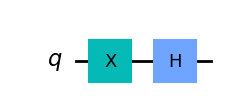

In [2]:
qc = QuantumCircuit(1)
#qc.rz(np.pi/3, [0])
#qc.rx(np.pi/3, [0])
#qc.cx(0, 1)
qc.x(0)
qc.h(0)
qc.draw('mpl')

In [3]:
operator1 = Z
psi = StateFn(qc)
expectation_value1 = (~psi @ operator1 @ psi).eval()
print(expectation_value1.real)

0.0


In [4]:
operator2 = X
expectation_value2 = (~psi @ operator2 @ psi).eval()
print(expectation_value2.real)

-0.9999999999999998


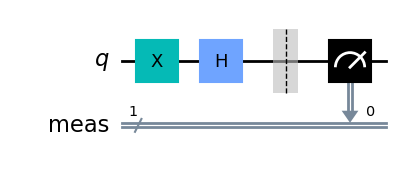

In [5]:
qc1 = qc.copy()
qc1.measure_all()
qc1.draw('mpl')

In [6]:
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import vector2latex

In [7]:
local_backend = Aer.get_backend('qasm_simulator') 
job = execute(qc1, local_backend, shots=1024) 
result = job.result()

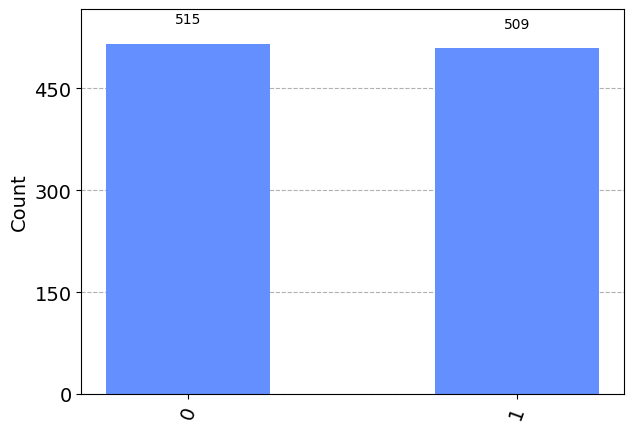

In [8]:
data = result.get_counts(qc1)
plot_histogram(data)

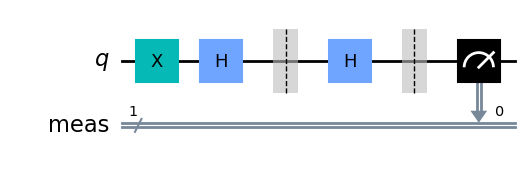

In [9]:
qc2 = qc.copy()
qc2.barrier()
qc2.h(0)
qc2.measure_all()
qc2.draw('mpl')

In [10]:
job2 = execute(qc2, local_backend, shots=1024) 
result2 = job2.result()

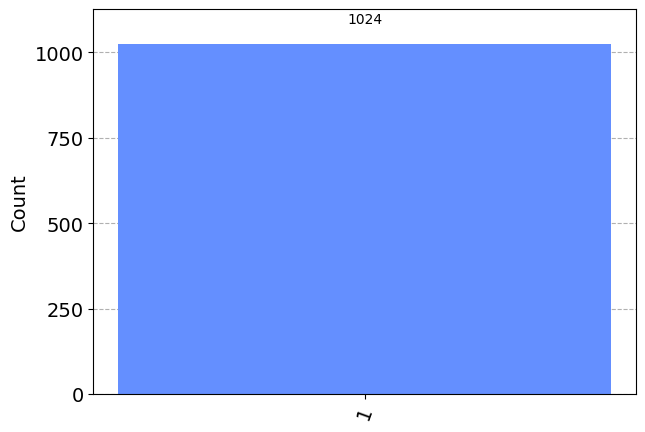

In [11]:
data2 = result2.get_counts(qc2)
plot_histogram(data2)